<a href="https://colab.research.google.com/github/ambideXtrous9/PyTorch-Models/blob/main/PyTorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import torch
from torch import nn

In [138]:
class MNISTNeuralNet(nn.Module):
    def __init__(self,config:dict):
        super().__init__()

        self.conv = nn.Sequential( #1x28x28
            nn.Conv2d(in_channels=1,out_channels=8,kernel_size=5), # 8x24x24
            nn.Dropout2d(p=0.4,inplace=True),
            nn.LeakyReLU(negative_slope=0.02,inplace=True),
            nn.BatchNorm2d(num_features=8),
            nn.MaxPool2d(2), # 8x12x12
            nn.Conv2d(in_channels=8,out_channels=32,kernel_size=3), # 32x10x10
            nn.Dropout2d(p=0.4,inplace=True),
            nn.LeakyReLU(negative_slope=0.02,inplace=True),
            nn.BatchNorm2d(num_features=32),
            nn.MaxPool2d(2), #32x5x5
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=2), # 64x4x4
            nn.Dropout2d(p=0.4,inplace=True),
            nn.BatchNorm2d(64)
            )

        self.linear = nn.Sequential(
            nn.Linear(in_features=64*4*4,out_features=512),
            nn.LeakyReLU(negative_slope=0.02,inplace=True),
            nn.BatchNorm1d(num_features=512),
            nn.Dropout(p=0.4,inplace=True),
            nn.Linear(in_features=512,out_features=config['num_classes']),
            nn.Softmax(dim=1))

    def forward(self,x):
        x = self.conv(x)
        x = x.view(x.size(0),-1)
        x = self.linear(x)
        return x


In [139]:
config = {'num_classes' : 10}

In [140]:
model = MNISTNeuralNet(config=config)

In [141]:
model.get_parameter

<bound method Module.get_parameter of MNISTNeuralNet(
  (conv): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): Dropout2d(p=0.4, inplace=True)
    (2): LeakyReLU(negative_slope=0.02, inplace=True)
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1))
    (6): Dropout2d(p=0.4, inplace=True)
    (7): LeakyReLU(negative_slope=0.02, inplace=True)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (11): Dropout2d(p=0.4, inplace=True)
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.02, inplace=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=True)
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)>

In [142]:
loss_fnc = nn.CrossEntropyLoss(reduction='mean')
optimizer = torch.optim.AdamW(lr=0.001,params=model.parameters())


In [143]:
import torchvision
from torchvision import transforms

In [144]:
transform = transforms.Compose([transforms.ToTensor()])

In [145]:
train = torchvision.datasets.MNIST(root='./',
                                   download=True,
                                   transform=transform,
                                   train=True)

test = torchvision.datasets.MNIST(root='./',
                                   download=True,
                                   transform=transform,
                                   train=False)

In [146]:
from torch.utils.data import DataLoader

In [147]:
train_dataloader = DataLoader(train,batch_size = 16,shuffle=True,drop_last=True)
val_dataloader = DataLoader(test,batch_size = 16,shuffle=False,drop_last=True)

In [148]:
import matplotlib.pyplot as plt

torch.Size([1, 28, 28])


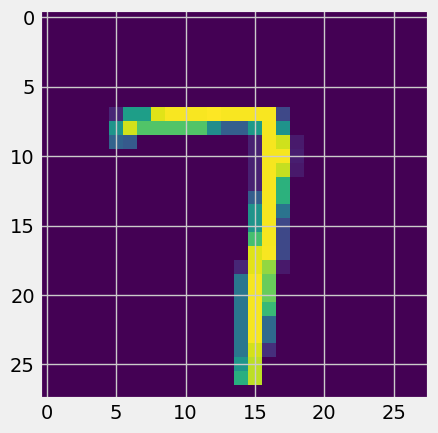

Pred Prob = 0.10586286336183548 || Pred Elem = 0
Loss = 2.303502082824707


In [149]:
for i,(data,target) in enumerate(train_dataloader):
    model.eval()
    print(data[0].shape)
    plt.imshow(data[0].permute(1, 2, 0))
    plt.show()
    pred = model(data[0].unsqueeze(0))
    prob,idx = torch.max(pred,dim=1)
    print(f"Pred Prob = {prob[0]} || Pred Elem = {idx[0]}")

    loss = loss_fnc(pred,target[0].unsqueeze(0))

    print(f"Loss = {loss}")

    break

In [150]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [151]:
len(train_dataloader)

3750

In [152]:
model.to(device)

MNISTNeuralNet(
  (conv): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): Dropout2d(p=0.4, inplace=True)
    (2): LeakyReLU(negative_slope=0.02, inplace=True)
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1))
    (6): Dropout2d(p=0.4, inplace=True)
    (7): LeakyReLU(negative_slope=0.02, inplace=True)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (11): Dropout2d(p=0.4, inplace=True)
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): LeakyReLU(negative_slop

In [153]:
from tqdm import tqdm

In [154]:
def trainFunc(epoch):
    model.train()
    epoch_loss = 0
    total_correct = 0

    for batch_idx,(data,target) in enumerate(tqdm(train_dataloader)):
        (data,target) = (data.to(device),target.to(device))

        optimizer.zero_grad()

        pred = model(data)
        loss = loss_fnc(pred,target)

        loss.backward()
        optimizer.step()

        epoch_loss = epoch_loss + (loss.item()*target.shape[0])
        _,output = torch.max(pred,dim=1)
        total_correct = total_correct + (output==target).sum().item()



    epoch_loss = epoch_loss / len(train_dataloader.dataset)
    total_correct = total_correct / len(train_dataloader.dataset)

    print(f"Epoch = {epoch} || Train Loss = {epoch_loss} || Train Accuracy = {total_correct}")
    return epoch_loss,total_correct

In [155]:
def valFunc(epoch):
    model.eval()
    epoch_loss = 0
    total_correct = 0
    with torch.no_grad():
        for batch_idx,(data,target) in enumerate(tqdm(val_dataloader)):
            (data,target) = (data.to(device),target.to(device))

            pred = model(data)
            loss = loss_fnc(pred,target)

            epoch_loss = epoch_loss + (loss.item()*target.shape[0])
            _,output = torch.max(pred,dim=1)
            total_correct = total_correct + (output==target).sum().item()

    epoch_loss = epoch_loss / len(val_dataloader.dataset)
    total_correct = total_correct / len(val_dataloader.dataset)

    print(f"Epoch = {epoch} || Val Loss = {epoch_loss} || Val Accuracy = {total_correct}")
    return epoch_loss,total_correct

In [156]:
import numpy as np


In [157]:
def trainer(epochs):
    Train_loss = []
    Train_accuracy = []
    Val_loss = []
    Val_accuracy = []

    for i in range(1,epochs+1):
        TL,TA = trainFunc(i)
        Train_loss.append(TL)
        Train_accuracy.append(TA)
        VL,VA = valFunc(i)
        Val_loss.append(VL)
        Val_accuracy.append(VA)
        print("\n---------------------------------------------------\n")

    xx = np.arange(epochs)
    plt.style.use("fivethirtyeight")

    acctr = torch.Tensor(Train_accuracy).detach().cpu().numpy()
    lsstr = torch.Tensor(Train_loss).detach().cpu().numpy()
    accte = torch.Tensor(Val_accuracy).detach().cpu().numpy()
    lsste = torch.Tensor(Val_loss).detach().cpu().numpy()

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
    fig.suptitle('ACC vs LOSS')
    ax1.plot(xx, acctr,label='Train')
    ax1.plot(xx,accte,label='Val')
    ax1.legend(loc="best")
    ax2.plot(xx, lsstr,label='Train')
    ax2.plot(xx, lsste,label='Val')
    ax2.legend(loc="best")
    plt.show()



100%|██████████| 3750/3750 [00:22<00:00, 163.81it/s]


Epoch = 1 || Train Loss = 1.5910031572024028 || Train Accuracy = 0.8774333333333333


100%|██████████| 625/625 [00:01<00:00, 342.18it/s]


Epoch = 1 || Val Loss = 1.4946909334182739 || Val Accuracy = 0.967

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.53it/s]


Epoch = 2 || Train Loss = 1.5366194093704224 || Train Accuracy = 0.9267333333333333


100%|██████████| 625/625 [00:01<00:00, 342.27it/s]


Epoch = 2 || Val Loss = 1.4852806024551393 || Val Accuracy = 0.977

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 166.26it/s]


Epoch = 3 || Train Loss = 1.5276788925806681 || Train Accuracy = 0.9346333333333333


100%|██████████| 625/625 [00:01<00:00, 334.60it/s]


Epoch = 3 || Val Loss = 1.4837564975738526 || Val Accuracy = 0.9786

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 170.04it/s]


Epoch = 4 || Train Loss = 1.522307399336497 || Train Accuracy = 0.9396


100%|██████████| 625/625 [00:01<00:00, 333.46it/s]


Epoch = 4 || Val Loss = 1.4806860067367553 || Val Accuracy = 0.9807

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 169.49it/s]


Epoch = 5 || Train Loss = 1.51967762854894 || Train Accuracy = 0.9417


100%|██████████| 625/625 [00:01<00:00, 337.45it/s]


Epoch = 5 || Val Loss = 1.4790981576919555 || Val Accuracy = 0.9822

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.64it/s]


Epoch = 6 || Train Loss = 1.5163879453023275 || Train Accuracy = 0.9454333333333333


100%|██████████| 625/625 [00:01<00:00, 342.48it/s]


Epoch = 6 || Val Loss = 1.48014693069458 || Val Accuracy = 0.9814

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.40it/s]


Epoch = 7 || Train Loss = 1.5133341682751973 || Train Accuracy = 0.9481166666666667


100%|██████████| 625/625 [00:01<00:00, 335.51it/s]


Epoch = 7 || Val Loss = 1.4775344638824464 || Val Accuracy = 0.984

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 170.40it/s]


Epoch = 8 || Train Loss = 1.5122069012006123 || Train Accuracy = 0.94945


100%|██████████| 625/625 [00:01<00:00, 342.50it/s]


Epoch = 8 || Val Loss = 1.4769498208999634 || Val Accuracy = 0.9847

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.58it/s]


Epoch = 9 || Train Loss = 1.510177134068807 || Train Accuracy = 0.9514


100%|██████████| 625/625 [00:01<00:00, 336.68it/s]


Epoch = 9 || Val Loss = 1.4787980827331544 || Val Accuracy = 0.9822

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 170.44it/s]


Epoch = 10 || Train Loss = 1.5106599644978842 || Train Accuracy = 0.9509


100%|██████████| 625/625 [00:01<00:00, 334.54it/s]


Epoch = 10 || Val Loss = 1.4759995294570922 || Val Accuracy = 0.985

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.33it/s]


Epoch = 11 || Train Loss = 1.5063037643114725 || Train Accuracy = 0.95525


100%|██████████| 625/625 [00:01<00:00, 329.55it/s]


Epoch = 11 || Val Loss = 1.4758477369308471 || Val Accuracy = 0.9854

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 169.88it/s]


Epoch = 12 || Train Loss = 1.5069963938713073 || Train Accuracy = 0.9541833333333334


100%|██████████| 625/625 [00:01<00:00, 328.03it/s]


Epoch = 12 || Val Loss = 1.4751623807907104 || Val Accuracy = 0.9869

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.69it/s]


Epoch = 13 || Train Loss = 1.5059518106460572 || Train Accuracy = 0.9558


100%|██████████| 625/625 [00:01<00:00, 320.56it/s]


Epoch = 13 || Val Loss = 1.4742722551345826 || Val Accuracy = 0.9873

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.40it/s]


Epoch = 14 || Train Loss = 1.5059669097264607 || Train Accuracy = 0.9559833333333333


100%|██████████| 625/625 [00:02<00:00, 311.00it/s]


Epoch = 14 || Val Loss = 1.474561897087097 || Val Accuracy = 0.9865

---------------------------------------------------



100%|██████████| 3750/3750 [00:22<00:00, 167.00it/s]


Epoch = 15 || Train Loss = 1.504215055878957 || Train Accuracy = 0.9575166666666667


100%|██████████| 625/625 [00:02<00:00, 283.21it/s]


Epoch = 15 || Val Loss = 1.4762635080337525 || Val Accuracy = 0.9846

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 173.47it/s]


Epoch = 16 || Train Loss = 1.504692429447174 || Train Accuracy = 0.9568


100%|██████████| 625/625 [00:02<00:00, 274.20it/s]


Epoch = 16 || Val Loss = 1.4752963764190674 || Val Accuracy = 0.9859

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 173.79it/s]


Epoch = 17 || Train Loss = 1.5044262220382691 || Train Accuracy = 0.9577666666666667


100%|██████████| 625/625 [00:02<00:00, 266.41it/s]


Epoch = 17 || Val Loss = 1.4747663200378418 || Val Accuracy = 0.9867

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 175.10it/s]


Epoch = 18 || Train Loss = 1.5021901492118837 || Train Accuracy = 0.9594166666666667


100%|██████████| 625/625 [00:02<00:00, 256.42it/s]


Epoch = 18 || Val Loss = 1.4746837608337402 || Val Accuracy = 0.987

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 175.54it/s]


Epoch = 19 || Train Loss = 1.5019518244425456 || Train Accuracy = 0.96


100%|██████████| 625/625 [00:02<00:00, 258.72it/s]


Epoch = 19 || Val Loss = 1.4749107988357544 || Val Accuracy = 0.9864

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 175.10it/s]


Epoch = 20 || Train Loss = 1.501890740966797 || Train Accuracy = 0.9599


100%|██████████| 625/625 [00:02<00:00, 259.14it/s]


Epoch = 20 || Val Loss = 1.4749541681289673 || Val Accuracy = 0.9866

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 174.01it/s]


Epoch = 21 || Train Loss = 1.5008648680686951 || Train Accuracy = 0.9609


100%|██████████| 625/625 [00:02<00:00, 254.92it/s]


Epoch = 21 || Val Loss = 1.4741904752731323 || Val Accuracy = 0.9876

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 174.20it/s]


Epoch = 22 || Train Loss = 1.5021700479189555 || Train Accuracy = 0.9597166666666667


100%|██████████| 625/625 [00:02<00:00, 257.18it/s]


Epoch = 22 || Val Loss = 1.4735126922607422 || Val Accuracy = 0.988

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 174.28it/s]


Epoch = 23 || Train Loss = 1.5008078893025716 || Train Accuracy = 0.9607833333333333


100%|██████████| 625/625 [00:02<00:00, 261.00it/s]


Epoch = 23 || Val Loss = 1.4731813722610474 || Val Accuracy = 0.9883

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 174.49it/s]


Epoch = 24 || Train Loss = 1.4998359875361125 || Train Accuracy = 0.9618666666666666


100%|██████████| 625/625 [00:02<00:00, 264.27it/s]


Epoch = 24 || Val Loss = 1.4744174722671508 || Val Accuracy = 0.9864

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 173.06it/s]


Epoch = 25 || Train Loss = 1.4995704593022665 || Train Accuracy = 0.9623333333333334


100%|██████████| 625/625 [00:02<00:00, 280.56it/s]


Epoch = 25 || Val Loss = 1.4737930864334106 || Val Accuracy = 0.9877

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 172.67it/s]


Epoch = 26 || Train Loss = 1.4989295758565266 || Train Accuracy = 0.9628666666666666


100%|██████████| 625/625 [00:02<00:00, 281.69it/s]


Epoch = 26 || Val Loss = 1.4738083772659303 || Val Accuracy = 0.9875

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.69it/s]


Epoch = 27 || Train Loss = 1.4985837199529013 || Train Accuracy = 0.9630833333333333


100%|██████████| 625/625 [00:01<00:00, 326.84it/s]


Epoch = 27 || Val Loss = 1.4750702285766601 || Val Accuracy = 0.9865

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 172.00it/s]


Epoch = 28 || Train Loss = 1.4988434810638427 || Train Accuracy = 0.9630666666666666


100%|██████████| 625/625 [00:01<00:00, 339.24it/s]


Epoch = 28 || Val Loss = 1.4734919078826905 || Val Accuracy = 0.9876

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.54it/s]


Epoch = 29 || Train Loss = 1.4994910242080688 || Train Accuracy = 0.9622


100%|██████████| 625/625 [00:01<00:00, 340.32it/s]


Epoch = 29 || Val Loss = 1.4734966039657593 || Val Accuracy = 0.9878

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.87it/s]


Epoch = 30 || Train Loss = 1.498990505250295 || Train Accuracy = 0.9627


100%|██████████| 625/625 [00:01<00:00, 343.74it/s]


Epoch = 30 || Val Loss = 1.4729271484375 || Val Accuracy = 0.9881

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.04it/s]


Epoch = 31 || Train Loss = 1.4984234493255615 || Train Accuracy = 0.9634833333333334


100%|██████████| 625/625 [00:01<00:00, 334.66it/s]


Epoch = 31 || Val Loss = 1.475114640045166 || Val Accuracy = 0.9861

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.36it/s]


Epoch = 32 || Train Loss = 1.4987314521153767 || Train Accuracy = 0.9630333333333333


100%|██████████| 625/625 [00:01<00:00, 341.09it/s]


Epoch = 32 || Val Loss = 1.473611474609375 || Val Accuracy = 0.9876

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.88it/s]


Epoch = 33 || Train Loss = 1.497532168229421 || Train Accuracy = 0.96405


100%|██████████| 625/625 [00:01<00:00, 343.48it/s]


Epoch = 33 || Val Loss = 1.4735187902450562 || Val Accuracy = 0.9875

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.77it/s]


Epoch = 34 || Train Loss = 1.497634361044566 || Train Accuracy = 0.9643


100%|██████████| 625/625 [00:01<00:00, 342.16it/s]


Epoch = 34 || Val Loss = 1.4736552560806275 || Val Accuracy = 0.9875

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.53it/s]


Epoch = 35 || Train Loss = 1.4977104125022889 || Train Accuracy = 0.964


100%|██████████| 625/625 [00:01<00:00, 340.65it/s]


Epoch = 35 || Val Loss = 1.4722172218322753 || Val Accuracy = 0.9895

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.64it/s]


Epoch = 36 || Train Loss = 1.4975593918164571 || Train Accuracy = 0.964


100%|██████████| 625/625 [00:01<00:00, 341.45it/s]


Epoch = 36 || Val Loss = 1.4728418809890746 || Val Accuracy = 0.9884

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.51it/s]


Epoch = 37 || Train Loss = 1.4976669397672018 || Train Accuracy = 0.9642333333333334


100%|██████████| 625/625 [00:01<00:00, 331.69it/s]


Epoch = 37 || Val Loss = 1.4735145259857179 || Val Accuracy = 0.9879

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.64it/s]


Epoch = 38 || Train Loss = 1.4976368279457093 || Train Accuracy = 0.9642833333333334


100%|██████████| 625/625 [00:01<00:00, 340.57it/s]


Epoch = 38 || Val Loss = 1.4717967428207397 || Val Accuracy = 0.9893

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.58it/s]


Epoch = 39 || Train Loss = 1.4969015101750691 || Train Accuracy = 0.9650666666666666


100%|██████████| 625/625 [00:01<00:00, 343.46it/s]


Epoch = 39 || Val Loss = 1.4726678058624267 || Val Accuracy = 0.9888

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.77it/s]


Epoch = 40 || Train Loss = 1.49738079551061 || Train Accuracy = 0.96485


100%|██████████| 625/625 [00:01<00:00, 338.98it/s]


Epoch = 40 || Val Loss = 1.4751889207839965 || Val Accuracy = 0.986

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.53it/s]


Epoch = 41 || Train Loss = 1.496727614180247 || Train Accuracy = 0.9649833333333333


100%|██████████| 625/625 [00:01<00:00, 339.91it/s]


Epoch = 41 || Val Loss = 1.4731530122756957 || Val Accuracy = 0.9884

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.61it/s]


Epoch = 42 || Train Loss = 1.4976165228525797 || Train Accuracy = 0.9643166666666667


100%|██████████| 625/625 [00:01<00:00, 330.76it/s]


Epoch = 42 || Val Loss = 1.4715465599060058 || Val Accuracy = 0.9898

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.82it/s]


Epoch = 43 || Train Loss = 1.4973848745028178 || Train Accuracy = 0.96435


100%|██████████| 625/625 [00:01<00:00, 341.54it/s]


Epoch = 43 || Val Loss = 1.4721572206497193 || Val Accuracy = 0.9898

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.18it/s]


Epoch = 44 || Train Loss = 1.4977757803599039 || Train Accuracy = 0.96385


100%|██████████| 625/625 [00:01<00:00, 339.19it/s]


Epoch = 44 || Val Loss = 1.4720283430099488 || Val Accuracy = 0.9895

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.23it/s]


Epoch = 45 || Train Loss = 1.496999995326996 || Train Accuracy = 0.9647


100%|██████████| 625/625 [00:01<00:00, 337.04it/s]


Epoch = 45 || Val Loss = 1.4733651103973389 || Val Accuracy = 0.9879

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 172.12it/s]


Epoch = 46 || Train Loss = 1.4975928224245707 || Train Accuracy = 0.96405


100%|██████████| 625/625 [00:01<00:00, 337.96it/s]


Epoch = 46 || Val Loss = 1.4735392221450805 || Val Accuracy = 0.9878

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 171.42it/s]


Epoch = 47 || Train Loss = 1.4976908349990845 || Train Accuracy = 0.9641333333333333


100%|██████████| 625/625 [00:01<00:00, 335.96it/s]


Epoch = 47 || Val Loss = 1.472770578956604 || Val Accuracy = 0.9884

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 170.52it/s]


Epoch = 48 || Train Loss = 1.4981539269765218 || Train Accuracy = 0.9636833333333333


100%|██████████| 625/625 [00:01<00:00, 320.85it/s]


Epoch = 48 || Val Loss = 1.4721836772918702 || Val Accuracy = 0.9889

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 172.02it/s]


Epoch = 49 || Train Loss = 1.496351320807139 || Train Accuracy = 0.9655666666666667


100%|██████████| 625/625 [00:02<00:00, 305.76it/s]


Epoch = 49 || Val Loss = 1.4730297311782836 || Val Accuracy = 0.9884

---------------------------------------------------



100%|██████████| 3750/3750 [00:21<00:00, 172.11it/s]


Epoch = 50 || Train Loss = 1.497090540599823 || Train Accuracy = 0.9648666666666667


100%|██████████| 625/625 [00:02<00:00, 263.43it/s]


Epoch = 50 || Val Loss = 1.472283805847168 || Val Accuracy = 0.9894

---------------------------------------------------



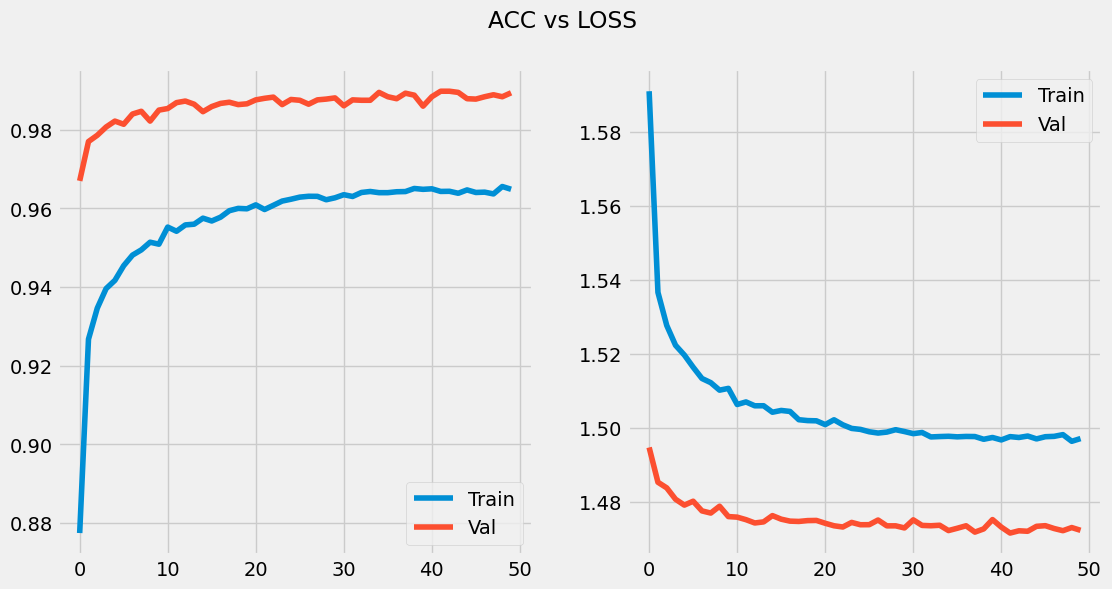

In [158]:
trainer(epochs=50)

In [159]:
val_dataloader = DataLoader(test,batch_size = 16,shuffle=True)

torch.Size([1, 28, 28])


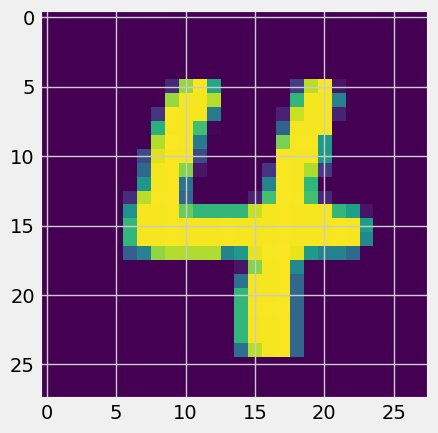

Pred Prob = 1.0 || Pred Elem = 4


In [160]:
data = next(iter(val_dataloader))[0]
with torch.no_grad():
  model.eval()
  print(data[0].shape)
  plt.imshow(data[0].permute(1, 2, 0))
  plt.show()
  pred = model(data[0].unsqueeze(0).to(device))
  prob,idx = torch.max(pred,dim=1)
  print(f"Pred Prob = {prob[0]} || Pred Elem = {idx[0]}")